In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("C:/Users/yourlocalfilepath/HR_file.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [6]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


# Exploring and Detecting Data

In [7]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments', 'salary'],
      dtype='object')

In [8]:
df['average_montly_hours'].min()

96

In [9]:
df['time_spend_company'].max()

10

In [13]:
df['salary'].head(9)

0       low
1    medium
2    medium
3       low
4       low
5       low
6       low
7       low
8       low
Name: salary, dtype: object

In [14]:
#So we have some data that needs organized here in order for us to extract useful information for our needs but we now know the 
# max average monthly hours of employees in our dataset is 96, and the minimum time at the company is "10" ...is this months or years? let's look at columns
df.head(10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [16]:
#without knowing anything, i'd guess that's 10 years rather than 10 months and we can see our table has boolean data, as well. 
# so let's have some fun using the seaborn and matplotlib libraries
#you can run '!pip list' to see what you have installed already

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [20]:
df['satisfaction_level'].max()

1.0

In [21]:
#Visual Analysis featuring univariate, bivariate, and multivariate types

In [22]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Departments               object
salary                    object
dtype: object

<AxesSubplot:ylabel='left'>

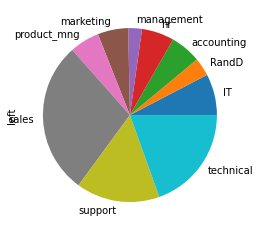

In [24]:
#we now see we have floats, integeres and objects. so let's groupby something. We are going to find how many of each Department type is our in our data,
# and include that with .plot to display it in a visualisation. I picked a Pie Chart type (univary), but you can go for whatever you like:
df.groupby('Departments')['left'].sum().plot(kind='pie')

<AxesSubplot:ylabel='Departments'>

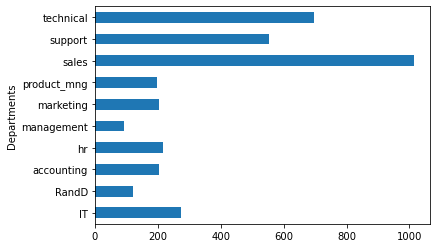

In [25]:
#this data is a little jumbled in my pie chart, so let's do it again something more readable like a horizontal bar chart:
df.groupby('Departments')['left'].sum().plot(kind='barh')

<AxesSubplot:ylabel='Departments'>

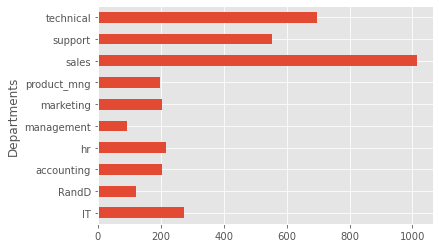

In [26]:
#so what if we need to clarify our x and y values, because we don't quite like the size (we could us 'plt.figure(figsize=(7,5))
#or maybe i know about a matplotlib tool that has a style version i really like for this... like so:
plt.style.use('ggplot')
df.groupby('Departments')['left'].sum().plot(kind='barh')

Text(0.5, 1.0, 'Bivariate Analysis: AVG Hours vs Time at Company')

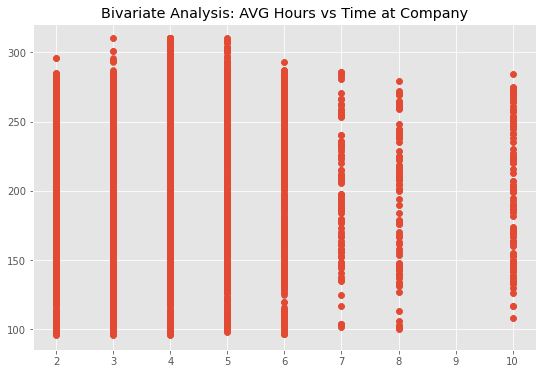

In [33]:
#that looks lovely... but what if we want to compare a couple of items. let's choose a scatterplat (bivary) and compare
#what i think would be interesting (and of the same data type) -hours avg worked and -time with the company
#and let's change the size while we are here 
plt.figure(figsize=(9,6))
plt.scatter(df['time_spend_company'],df['average_montly_hours'])
#and then give it a title
plt.title('Bivariate Analysis: AVG Hours vs Time at Company')

In [31]:
#you notice it kept the formatting from our previous call for ggplot style -which works well for me.
#matplotlib has a lot of options for customization if you like to get weird
#Let's now try out Seaborn! it loves data as much as you.

<AxesSubplot:xlabel='Departments', ylabel='satisfaction_level'>

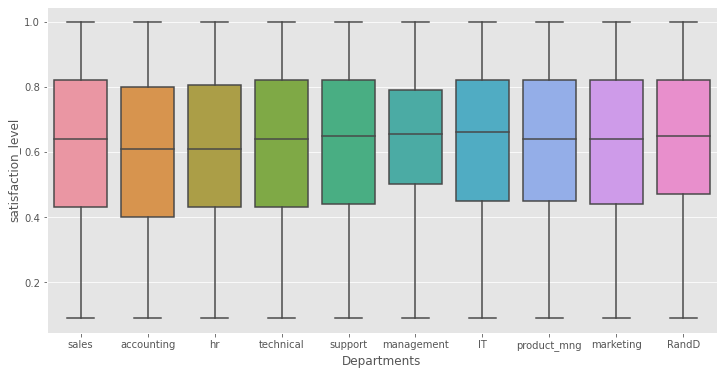

In [36]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df['Departments'],y=df['satisfaction_level'])

In [ ]:
#that looks nice and big and colorful, and compares something human capital managers should love.

# Checking Packages

In [13]:
!pip list

Package                            Version
---------------------------------- -------------------
alabaster                          0.7.12
anaconda-client                    1.7.2
anaconda-navigator                 2.0.3
anaconda-project                   0.9.1
anyio                              2.2.0
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        20.1.0
asn1crypto                         1.4.0
astroid                            2.5
astropy                            4.2.1
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              20.3.0
autopep8                           1.5.6
Babel                              2.9.0
backcall                           0.2.0
backports.functools-lru-cache      1.6.4
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 1.0
backports.weakref                  1.0.post1
bcrypt                             3.2